In [1]:
# 기본 라이브러리 불러오기
from scipy.misc import imread
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from wordcloud import WordCloud, ImageColorGenerator
import os
import pandas as pd

In [2]:
# 파일 이름으로 데이터 불러와서 컬럼명 바꿔주고, 날짜 바꿔주는 함수
def read_data(filename):
    colnames = ['nickname', 'id', 'date', 'tweet']
    path_twt = 'c:/python/workshopd/tweets/'
    data = pd.read_excel(path_twt + filename, header = 0)
    data.columns = colnames
    data['date'] = pd.to_datetime(data['date'], format = '%Y년 %m월 %d일')
    data.reset_index(inplace = True)
    data.drop(['index'], axis = 1, inplace = True)
    return data

In [3]:
# 날짜의 형식이 다른 경우가 있어서 만든 함수는 function_name2 로 표현 됨
def read_data2(filename):
    colnames = ['nickname', 'id', 'date', 'tweet']
    path_twt = 'c:/python/workshopd/tweets/'
    data = pd.read_excel(path_twt + filename, header = 0)
    data.columns = colnames
    data.reset_index(inplace = True)
    data.drop(['index'], axis = 1, inplace = True)
    return data

In [4]:
# 불러온 데이터를 전처리해서 워드 클라우드에 사용할 수 있게 해주는 함수들
import re
from konlpy.tag import Twitter

def get_twts(filename):
    data = read_data(filename)
    regex = r'[가-힣]+'    # 한글만 모조리 불러오자
    parsed_twt = data['tweet'].dropna().map(lambda x: ' '.join(re.findall(regex, x)))
    processed_twt = ' '.join(parsed_twt)
    twt_pos = Twitter().pos(processed_twt, norm = True, stem = True)
    stop_words = ['세월호', '참사', '유가족']
    twt_noun = [''.join(k) for (k, v) in twt_pos if v == 'Noun' and len(k) > 1 and k not in stop_words]
    return ' '.join(twt_noun)

In [5]:
def get_twts2(filename):
    data = read_data2(filename)
    regex = r'[가-힣]+'    # 한글만 모조리 불러오자
    parsed_twt = data['tweet'].dropna().map(lambda x: ' '.join(re.findall(regex, x)))
    processed_twt = ' '.join(parsed_twt)    
    twt_pos = Twitter().pos(processed_twt, norm = True, stem = True)
    stop_words = ['세월호', '참사', '유가족']
    twt_noun = [''.join(k) for (k, v) in twt_pos if v == "Noun" and len(k) > 1 and k not in stop_words]
    return ' '.join(twt_noun)

In [6]:
# 워드 클라우드를 그려주는 함수
import random

# 단어의 색깔은 회색으로 하자
def grey_color_func(word, font_size, position, orientation, random_state=None, **kwargs):
    return "hsl(0, 0%%, %d%%)" % random.randint(50, 100)

def draw_wc(filename, logo_name):
    path_logo = 'c:/python/workshopd/sewol logos/'
    logo = imread(path_logo + logo_name)
    image_color = ImageColorGenerator(logo)
    data = get_twts(filename)
    wc = WordCloud(width = 1920, height = 1280, font_path = "C:\Windows\Fonts\YoonGothic750.otf",
               background_color = "black", ranks_only = True, mask = logo,
               color_func = grey_color_func, max_words = 500)
    wc.generate(data)
    plt.axis('off')
    plt.imshow(wc.recolor(color_func=grey_color_func, random_state=3))
    return wc.to_file(filename[:-5] + '.png')

In [7]:
def draw_wc2(filename, logo_name):
    path_logo = 'c:/python/workshopd/sewol logos/'
    logo = imread(path_logo + logo_name)
    image_color = ImageColorGenerator(logo)
    data = get_twts2(filename)
    wc = WordCloud(width = 1920, height = 1280, font_path = "C:\Windows\Fonts\YoonGothic750.otf",
               background_color = "black", ranks_only = True, mask = logo,
               color_func = grey_color_func, max_words = 500)
    wc.generate(data)
    plt.axis('off')
    plt.imshow(wc.recolor(color_func=grey_color_func, random_state=3))
    return wc.to_file(filename[:-5] + '.png')

In [8]:
# 이제 한 번에 모든 파일에 대한 워드 클라우드를 그릴 수 있도록 준비하자
import os
path = 'C:/python/workshopd/tweets/'
files = os.listdir(path)
files

['20141020.xlsx',
 '20141021.xlsx',
 '20141022.xlsx',
 '20141023.xlsx',
 '20141024.xlsx',
 '20141025.xlsx',
 '20141026.xlsx',
 '20141027.xlsx',
 '20141029.xlsx',
 '20141030.xlsx',
 '20141101.xlsx',
 '20141102.xlsx',
 '20141103.xlsx',
 '20141104.xlsx',
 '20141105.xlsx',
 '20141106.xlsx',
 '20141107.xlsx',
 '20141109.xlsx',
 '20141110.xlsx',
 '20141111.xlsx',
 '20141112.xlsx',
 '20141113.xlsx',
 '20141114.xlsx',
 '20141115.xlsx',
 '20141116.xlsx',
 '20141117.xlsx',
 '20160104.xlsx',
 '20160105.xlsx',
 '20160106.xlsx',
 '20160107.xlsx',
 '20160108.xlsx',
 '20160109.xlsx',
 '20160110.xlsx',
 '20160111.xlsx',
 '20160112.xlsx',
 '20160113.xlsx',
 '20160114.xlsx',
 '20160115.xlsx',
 '20160116.xlsx',
 '20160117.xlsx',
 '세월호_2014-04-16.xlsx',
 '세월호_2014-04-17.xlsx',
 '세월호_2014-04-18.xlsx',
 '세월호_2014-04-19.xlsx',
 '세월호_2014-04-20.xlsx',
 '세월호_2014-04-21.xlsx',
 '세월호_2014-04-22.xlsx',
 '세월호_2014-04-23.xlsx',
 '세월호_2015-04-09.xlsx',
 '세월호_2015-04-10.xlsx',
 '세월호_2015-04-11.xlsx',
 '세월호_2015-04-12

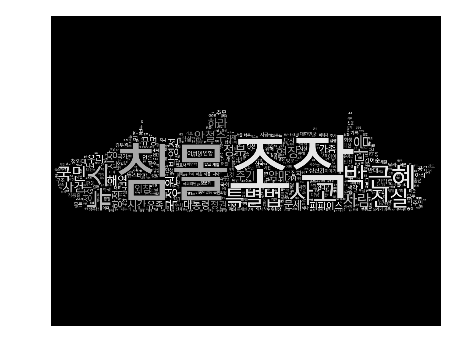

In [10]:
# 한 번에 그리기 시작!!
# 예외 처리를 이용해서 오류가 나면 오류가 난 파일을 알려주고 넘어가자.
for file in files:
    try:
        draw_wc2(file, '배.png')
    except:
        print(file, 'had an error.')
        pass